In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from hyppo.tools import SIMULATIONS
from hypothesis_tests import NEWCORR

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.titlesize'] = 20
# mpl.rcParams['text.usetex'] = True

In [3]:
sim_keys = list(SIMULATIONS.keys())[0:-2]
sim_keys

['linear',
 'exponential',
 'cubic',
 'joint_normal',
 'step',
 'quadratic',
 'w_shaped',
 'spiral',
 'uncorrelated_bernoulli',
 'logarithmic',
 'fourth_root',
 'sin_four_pi',
 'sin_sixteen_pi',
 'square',
 'two_parabolas',
 'circle',
 'ellipse',
 'diamond']

In [4]:
SIM_TITLES = [
    "Linear",
    "Exponential",
    "Cubic",
    "Joint Normal",
    "Step",
    "Quadratic",
    "W-Shaped",
    "Spiral",
    "Bernoulli",
    "Logarithmic",
    "Fourth Root",
    "Sine 4\u03C0",
    "Sine 16\u03C0",
    "Square",
    "Two Parabolas",
    "Circle",
    "Ellipse",
    "Diamond",
]

In [22]:
lims = {
    "square": 0.9,
    "two_parabolas": 0.999,
    "circle": 0.9,
    "ellipse": 0.9,
    "diamond": 0.9,
    "uncorrelated_bernoulli": 0.9,
    "w_shaped": 0.5,
    "sin_sixteen_pi": 0.5,
    "sin_four_pi": 0.5,
}

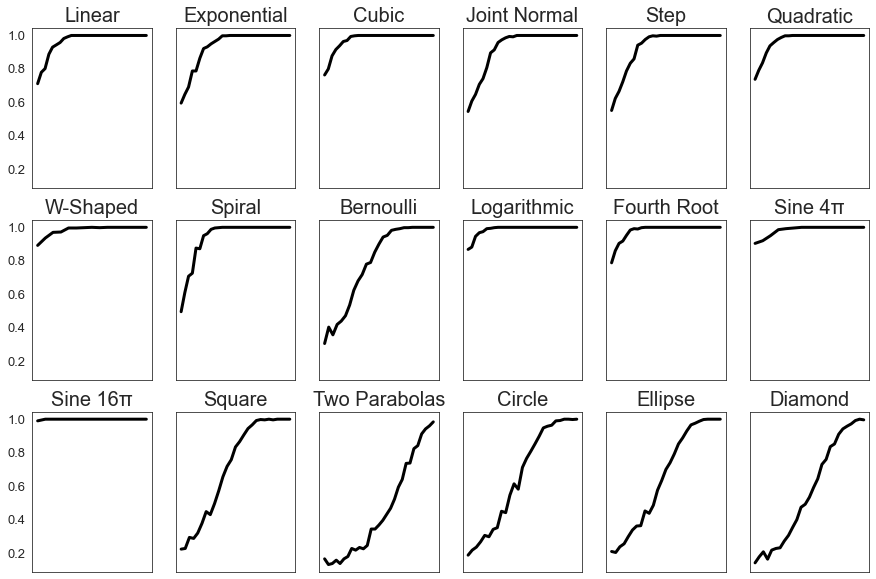

In [24]:
sns.set_style("white")

fig, ax = plt.subplots(3, 6, figsize=(15, 10), sharey=True)

sample_sizes = pickle.load(open("results/boosting/sample_sizes.p", "rb"))

for k, sim_name in enumerate(list(SIMULATIONS.keys())[0:-2]):
    i = k // 6
    j = k % 6

    y = []
    for test_name in [NEWCORR]:
        for n in sample_sizes:
            y.append(pickle.load(open(f"results/boosting/sim_{sim_name}_test_{test_name}_n_{n}_power.p", "rb")))

        if sim_name in lims:
            lim = int(len(sample_sizes) * lims[sim_name])
        else:
            lim = len(sample_sizes)
        ax[i, j].plot(sample_sizes[0:lim], y[0:lim], label=test_name, c="k")
    
        
    ax[i, j].set_title(SIM_TITLES[k])
    ax[i, j].set_xscale("log")
    ax[i, j].set_xticks([])